<a href="https://colab.research.google.com/github/melzismn/ComputerRobotVision/blob/main/DLT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
"""
Lab1 - Computer and Robot Vision 2022-2023

Simone Melzi - simone.melzi[at]unimib.it

DLT: projection matrix estimation using SVD and MSE

"""

# Utilities functions
import numpy as np
import cv2
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow

## Define the path for the image

TypeError: ignored

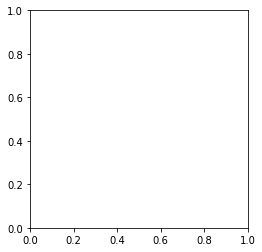

In [39]:
path_image = "/content/DLTtestImage.jpeg"
image = cv2.imread(path_image, 1)
plt.imshow(image)
plt.axis("off")
plt.show()

# List of selected points in the image

In [54]:
points_im = np.array([
    (990, 2342),
    (3394, 1356),
    (1259, 369),
    (1880, 1427),
    (3774, 796),
    (2165, 713),
    (1718, 1910),
    (3895, 1520)
])
#,    (2678, 754)
#     (2207, 228)


# List of selected points in 3D world

In [55]:
points_w = np.array([
    (27, 32, 5.4),
    (65, 44, 14.6),
    (32, 56.5, 25.4),
    (41, 47.5, 8.6),
    (77, 57, 14.2),
    (46.6, 66.5, 11),
    (37, 43, 0),
    (76.5, 44.2, 9.5)
])
#,    (78.3, 60.4, 0)
#     (47.5, 69.5, 19.4) 


# Solve DLT

In [56]:
H = np.zeros([16, 12])
i = 0
for point_im, point_w in (zip(points_im, points_w)):
    H[i, :] = np.array([-point_w[0], -point_w[1], -point_w[2], -1, 0, 0, 0, 0,
                        point_im[0] * point_w[0], point_im[0] * point_w[1],
                        point_im[0] * point_w[2], point_im[0]
                        ])

    H[i + 1, :] = np.array([0, 0, 0, 0, -point_w[0], -point_w[1], -point_w[2], -1,
                            point_im[1] * point_w[0], point_im[1] * point_w[1],
                            point_im[1] * point_w[2], point_im[1]
                            ])
    i += 2

_, _, vh = np.linalg.svd(H, full_matrices=True)

# Column with lower singular value
P = np.reshape(vh[-1, :], [3, 4])

results = [P @ np.array([x, y, z, 1]) for x, y, z in points_w]
results = np.array([(int(result[0] / result[2]), int(result[1] / result[2])) for result in results])


# Plot results


In [43]:
im = cv2.cvtColor(cv2.imread('./im.jpg'), cv2.COLOR_BGR2RGB)

plt.imshow(im)
for x, y in results:
    plt.plot(x, y, 'bo', markersize=3)
for u, v in points_im:
    plt.plot(u, v, 'go', markersize=3)
plt.show()


error: ignored

# Compute and show MSE

In [ ]:
mse = (np.linalg.norm(results - points_im, axis=0)).mean(axis=0)
print(f'MSE {mse}')